In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

import datetime

In [3]:
data = pd.read_csv('User behavior sample 2.csv',parse_dates=[3,6])
print(data.shape)
print(data.columns)
data.head()

(634, 17)
Index(['UserId', 'OrderId', 'Status', 'OrderDate', 'OrderTime', 'ASAP',
       'DeliveredTime', 'CompletionTime', 'Distance', 'RestaurantID',
       'TotalItem', 'Order Value', 'TotalDiscount', 'PaymentMethod',
       'DeviceOSType', 'AppType', 'Category'],
      dtype='object')


,UserId,OrderId,Status,OrderDate,OrderTime,ASAP,DeliveredTime,CompletionTime,Distance,RestaurantID,TotalItem,Order Value,TotalDiscount,PaymentMethod,DeviceOSType,AppType,Category
0,997400,760984,Delivered,2018-05-01,13:07:46,True,2018-05-01 14:44:00,96.817067,6.2,141966,4,222000,0,Cash,Web,Foody,"[Food, Lunch]"
1,997400,880315,Delivered,2018-05-30,13:09:14,True,2018-05-30 13:42:00,33.700000,6.2,141966,2,165000,0,Cash,Web,Foody,"[Food, Lunch]"
2,997400,876172,Delivered,2018-05-29,14:51:52,True,2018-05-29 15:24:00,32.150000,6.2,141966,2,190500,0,Cash,Web,Foody,"[Food, Lunch]"
3,997400,763694,Delivered,2018-05-02,11:06:15,True,2018-05-02 12:01:00,54.972550,8.7,1630,6,213000,0,Cash,Web,Foody,[Food]
4,997405,773532,Delivered,2018-05-04,18:35:37,True,2018-05-04 19:39:00,63.697100,4.0,7924,6,202500,0,Cash,iOS,Foody,"[Food, Lunch]"


# Section 01 - Data Analysis - Key Metrics

## A. Determine user behaviors and any other parameters you think make sense for a company like ours

In [4]:
print(data.Status.isnull().sum())
data.Status.value_counts()

0


Delivered    554
Cancel        80
Name: Status, dtype: int64

count    554.000000
mean       3.075271
std        2.122484
min        0.100000
25%        1.500000
50%        2.600000
75%        4.100000
max       13.000000
Name: Distance, dtype: float64


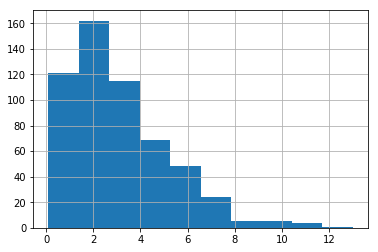

In [5]:
print(data[data.Status=='Delivered']['Distance'].describe())
data[data.Status=='Delivered']['Distance'].hist()

count    80.000000
mean      3.452500
std       2.317516
min       0.100000
25%       1.325000
50%       3.300000
75%       5.025000
max       8.900000
Name: Distance, dtype: float64


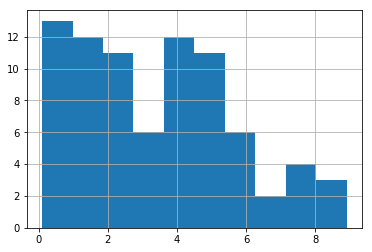

In [43]:
print(data[data.Status=='Cancel']['Distance'].describe())
data[data.Status=='Cancel']['Distance'].hist()

We could see that the Status of order does not have strong correlation with the Distance here when:
* The means of distance between 02 groups are so close
* The median of Cancel group is slightly larger than Delivered group but the max values of Delivered group reach to 13 comparing with 8.9 of Cancel group.

In [57]:
data['OrderWeekday'] = data['OrderDate'].apply(lambda x:x.weekday())

## B. Determine patterns of top users in terms of GMV

(253, 2)
count    2.530000e+02
mean     5.236577e+05
std      8.540521e+05
min      3.750000e+04
25%      1.500000e+05
50%      2.400000e+05
75%      5.250000e+05
max      8.604000e+06
Name: SumOrderValue, dtype: float64


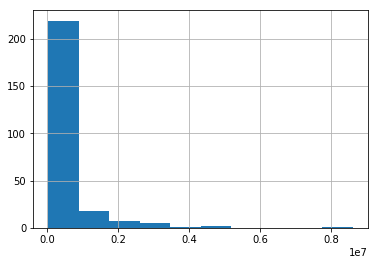

In [66]:
gmv_by_user = data.groupby('UserId',as_index=False).agg({'Order Value':'sum'})
gmv_by_user.columns = ['UserId','SumOrderValue']
print(gmv_by_user.shape)
print(gmv_by_user['SumOrderValue'].describe())
gmv_by_user['SumOrderValue'].hist()

Based on the distribution, we choose 5.250000e+05 as the threshold to choose top users by GMV

In [70]:
top_users = gmv_by_user[gmv_by_user['SumOrderValue']>5.250000e+05]['UserId']
top_users.shape

(63,)

In [71]:
data['is_top_user'] = np.where(data['UserId'].isin(top_users_top_25_percent),1,0)

count    297.000000
mean      55.944766
std       53.666895
min        6.216667
25%       30.130050
50%       42.791883
75%       64.376900
max      552.299283
Name: CompletionTime, dtype: float64


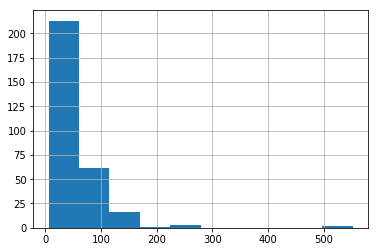

In [78]:
print(data[data.is_top_user==1]['CompletionTime'].describe())
data[data.is_top_user==1]['CompletionTime'].hist()

count    257.000000
mean      38.456090
std       18.131619
min       10.033333
25%       24.750000
50%       35.982783
75%       46.966667
max      150.511217
Name: CompletionTime, dtype: float64


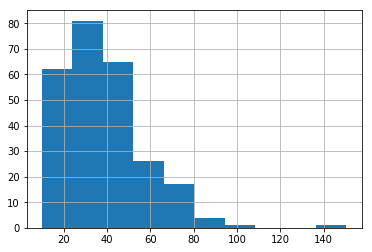

In [79]:
print(data[data.is_top_user==0]['CompletionTime'].describe())
data[data.is_top_user==0]['CompletionTime'].hist()

count    344.000000
mean       5.985465
std        9.536018
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max      111.000000
Name: TotalItem, dtype: float64


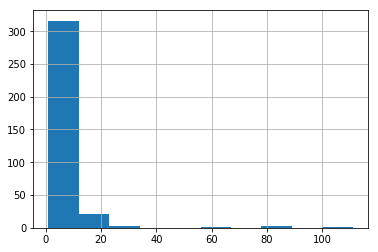

In [81]:
print(data[data.is_top_user==1]['TotalItem'].describe())
data[data.is_top_user==1]['TotalItem'].hist()

count    290.000000
mean       3.717241
std        4.094394
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       48.000000
Name: TotalItem, dtype: float64


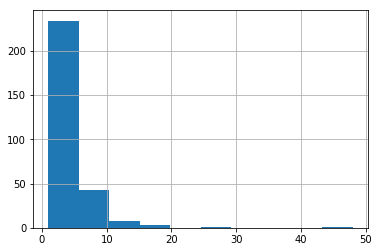

In [82]:
print(data[data.is_top_user==0]['TotalItem'].describe())
data[data.is_top_user==0]['TotalItem'].hist()

count    3.440000e+02
mean     2.660089e+05
std      2.562028e+05
min      3.000000e+04
25%      1.271250e+05
50%      1.987500e+05
75%      3.150000e+05
max      2.446500e+06
Name: Order Value, dtype: float64


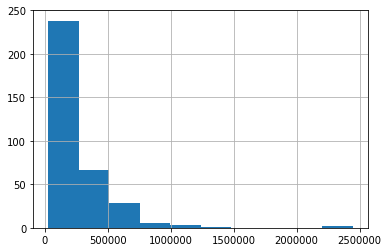

In [83]:
print(data[data.is_top_user==1]['Order Value'].describe())
data[data.is_top_user==1]['Order Value'].hist()

count       290.000000
mean     141304.655172
std       79310.884316
min       30000.000000
25%       81000.000000
50%      130500.000000
75%      180000.000000
max      454500.000000
Name: Order Value, dtype: float64


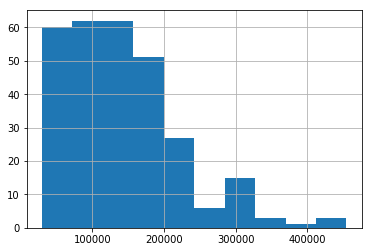

In [84]:
print(data[data.is_top_user==0]['Order Value'].describe())
data[data.is_top_user==0]['Order Value'].hist()

In [91]:
print(data[data.is_top_user==0].shape)
print(data[data.is_top_user==0].UserId.drop_duplicates().shape)
print(data[data.is_top_user==1].shape)
print(data[data.is_top_user==1].UserId.drop_duplicates().shape)


(290, 19)
(189,)
(344, 19)
(64,)


* For top users, the mean of completion time is higher because the mean of total item is larger. 
* The top users usually order more valued orders than the others do. 
* Moreover, they also have more orders than the others in same specific time window, for more details, 64 users in top user group ordered 344 times (~5.375 orders for 1 person) comparing with 189 normal users and 290 orders (~1.53 order for 1 person)

count    290.000000
mean       2.853103
std        2.076331
min        0.100000
25%        1.325000
50%        2.400000
75%        3.800000
max       13.000000
Name: Distance, dtype: float64


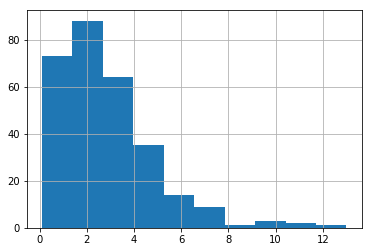

In [92]:
print(data[data.is_top_user==0]['Distance'].describe())
data[data.is_top_user==0]['Distance'].hist()

count    344.000000
mean       3.350291
std        2.187068
min        0.100000
25%        1.600000
50%        3.050000
75%        4.800000
max       11.700000
Name: Distance, dtype: float64


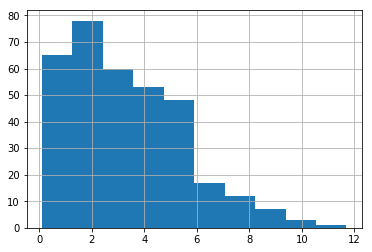

In [93]:
print(data[data.is_top_user==1]['Distance'].describe())
data[data.is_top_user==1]['Distance'].hist()

In [100]:
data['OrderHour'] = data['OrderTime'].apply(lambda x:datetime.datetime.strptime(x, '%H:%M:%S').time().hour)

count    290.000000
mean      15.334483
std        3.706608
min        0.000000
25%       12.000000
50%       15.000000
75%       18.000000
max       23.000000
Name: OrderHour, dtype: float64


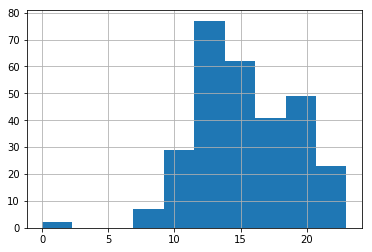

In [102]:
print(data[data.is_top_user==0]['OrderHour'].describe())
data[data.is_top_user==0]['OrderHour'].hist()

count    344.000000
mean      14.546512
std        3.878345
min        1.000000
25%       11.000000
50%       14.000000
75%       18.000000
max       23.000000
Name: OrderHour, dtype: float64


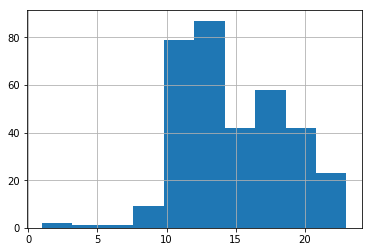

In [103]:
print(data[data.is_top_user==1]['OrderHour'].describe())
data[data.is_top_user==1]['OrderHour'].hist()

count      290.000000
mean      3526.100000
std       8516.647757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      46850.000000
Name: TotalDiscount, dtype: float64


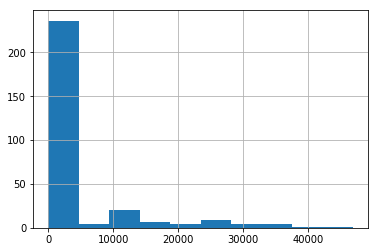

In [105]:
print(data[data.is_top_user==0]['TotalDiscount'].describe())
data[data.is_top_user==0]['TotalDiscount'].hist()

count       344.000000
mean      13831.892442
std       22307.909187
min           0.000000
25%           0.000000
50%           0.000000
75%       25700.000000
max      147850.000000
Name: TotalDiscount, dtype: float64


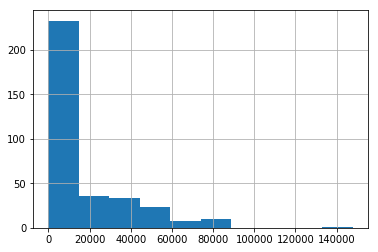

In [106]:
print(data[data.is_top_user==1]['TotalDiscount'].describe())
data[data.is_top_user==1]['TotalDiscount'].hist()

* One more point we could see is that in group of orders made by top users, the distribution of TotalDiscount have longer and thicker right tail. It absolutely makes sense.

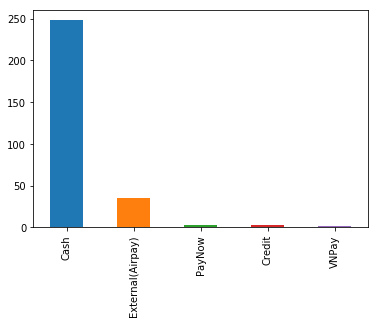

In [107]:
fig, ax = plt.subplots()
data[data.is_top_user==0]['PaymentMethod'].value_counts().plot(ax=ax, kind='bar')

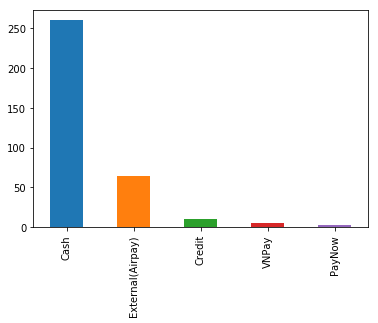

In [108]:
fig, ax = plt.subplots()
data[data.is_top_user==1]['PaymentMethod'].value_counts().plot(ax=ax, kind='bar')

Top users intended to use other payment methods because
* The suppliers usually give larger discount for non-cash payment methods
* There is a commitment to use one service in long term when we connect it with your payment method information like credit card number,...

iOS        178
Android     82
Web         30
Name: DeviceOSType, dtype: int64


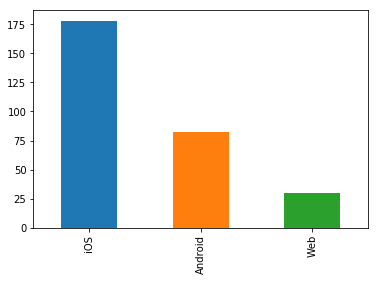

In [111]:
fig, ax = plt.subplots()
print(data[data.is_top_user==0]['DeviceOSType'].value_counts())
data[data.is_top_user==0]['DeviceOSType'].value_counts().plot(ax=ax, kind='bar')

iOS        189
Android     84
Web         71
Name: DeviceOSType, dtype: int64


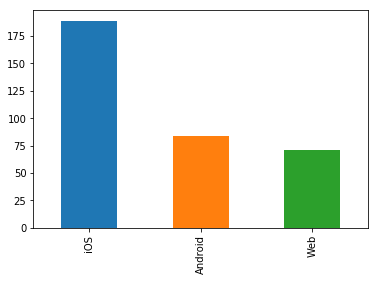

In [112]:
fig, ax = plt.subplots()
print(data[data.is_top_user==1]['DeviceOSType'].value_counts())
data[data.is_top_user==1]['DeviceOSType'].value_counts().plot(ax=ax, kind='bar')

It's a little bit strange here when the orders made from web of top user group is larger proportional comparing with the normal group. In my opinion, users who install the apps ans use them to order show much more commitment. However, the larger number of orders from web might also show that those users usually are officer in working hours.

In [115]:
data.Category.value_counts()

[Food]                    295
[Food, Lunch]             294
[Food, Drink]              22
[Streetfood]               20
[Dessert, Food, Drink]      3
Name: Category, dtype: int64

# Section 03 - Data Analysis - Business Insight

Based on some findings
* The relationship between OrderValue, TotalItem and is_top_user
* The relationship between TotalDiscount and is_top_user
* The relationship between PaymentMethod and is_top_user
* The relationship between DeviceOSType and is_top_user

We would have some decisions to drive business forward
* Give users higher discount value when the OrderValue meet some high values
* Give users higher discount value when they install and use apps to order
* Give users higher discount value when they use non-cash payment methods to order


# Section 04